<a href="https://colab.research.google.com/github/ajinkyajumde/airbnb-cap/blob/main/Copy_of_Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Import statements

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [ ]:
#mounting my drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#importing my csv file using data path as airbnb
file_path ='/content/drive/MyDrive/Colab Notebooks/ajinkya/Airbnb NYC 2019.csv'
airbnb=pd.read_csv(file_path)

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb['price_category']=airbnb.apply((lambda x: 'cheap' if x['price']<=80 else 'affordable' if x['price']>=80 and x['price']<=500 else 'Expensive' ),axis=1)
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,affordable
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,affordable
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,affordable
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,affordable
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,cheap
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,cheap
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,affordable
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,cheap


      host_name  number_of_reviews
2652       Dona                629
4931         Jj                607
6981       Maya                543
1673      Carol                540
2290   Danielle                510
936         Asa                488
10830     Wanda                480
6153      Linda                474
2273       Dani                467
661      Angela                466


Text(0.5, 1.0, 'Hosts vs Reviews')

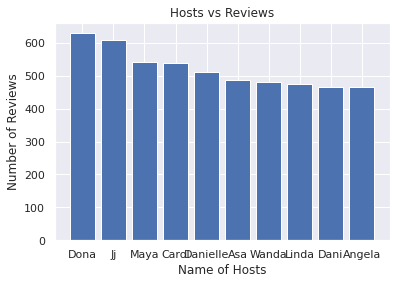

In [ ]:
busy=airbnb.groupby('host_name')['number_of_reviews'].max().reset_index()
busy=busy.sort_values(by='number_of_reviews',ascending=False)
busiest=busy.head(10)
print(busiest)
name=busiest['host_name']
reviews=busiest['number_of_reviews']
plt.bar(name,reviews)
plt.xlabel("Name of Hosts")
plt.ylabel("Number of Reviews")
plt.title("Hosts vs Reviews")

**As per the data frame generated by grouping it in terms of host name and room type and finding the maximum reviews earned by them, it is clear that Dona is the host who is reviewed the most. The top 10 hosts in terms of reviews earned by them are shown in the frame and the bar graph for the number of reviews is shown as well. As most of the people prefer Entire home/apt or private room,these hosts have earned most number of reviews.**

In [ ]:
neigh_grp = airbnb.groupby(['host_name','availability_365'])['id'].count().reset_index(name='count')
j=neigh_grp.sort_values(by='count',ascending=False).head()
j

,host_name,availability_365,count
7547,David,0,175
22087,Michael,0,175
27958,Sarah,0,126
7183,Daniel,0,113
893,Alex,0,101


**As the hosts in above dataframe are having maximum number of available rooms/apartments and least availability, these are the busiest hosts in the given dataset.**

In [ ]:
p = airbnb.groupby(['host_name','price_category'])['calculated_host_listings_count'].count().reset_index(name='no')
a=p.sort_values(by='no', ascending=False)
a.head(5)

,host_name,price_category,no
12463,Sonder (NYC),affordable,312
9150,Michael,affordable,288
3062,David,affordable,260
1744,Blueground,affordable,232
416,Alex,affordable,209


In [ ]:
k=airbnb.groupby('price_category')['id'].count().reset_index(name='number')
k

,price_category,number
0,Expensive,1044
1,affordable,30753
2,cheap,17098


**Here we consider the price less than or equal to 80 as cheap,more than 80 but less than 500 as affordable and more than 500 as expensive. The following pie chart shows the distribution of all the price categories in the given data.**

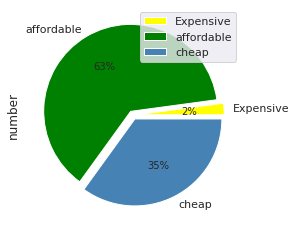

In [ ]:
# Defining colors for the pie chart
colors = ['yellow', 'green', 'steelblue']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)
  
# Plotting the pie chart for above dataframe
k.groupby(['price_category']).sum().plot(
    kind='pie', y='number', autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
j = airbnb.groupby(['neighbourhood_group','price_category'])['id'].count().reset_index(name='number')


**The above pie chart shows the price category distribution in the dataset. Least people prefer the expensive category, instead maximum people prefer affordable category followed by cheap category.**

   neighbourhood_group price_category  number
0                Bronx      Expensive       7
1                Bronx     affordable     354
2                Bronx          cheap     730
3             Brooklyn      Expensive     229
4             Brooklyn     affordable   11036
5             Brooklyn          cheap    8839
6            Manhattan      Expensive     773
7            Manhattan     affordable   16824
8            Manhattan          cheap    4064
9               Queens      Expensive      29
10              Queens     affordable    2386
11              Queens          cheap    3251
12       Staten Island      Expensive       6
13       Staten Island     affordable     153
14       Staten Island          cheap     214


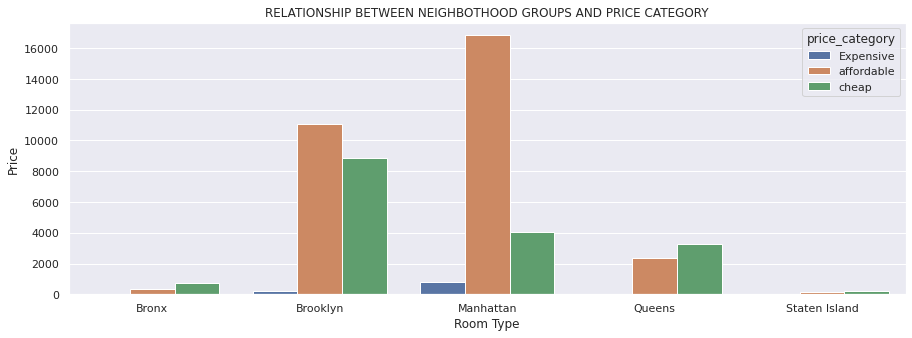

In [ ]:

print(j)
# j.pivot(index='neighbourhood_group', columns='price_category', values='number').plot(kind='barh')
plt.figure(figsize = (15,5))
z = sns.barplot(y= 'number', x= 'neighbourhood_group',hue='price_category',data=j)
z.set_title('RELATIONSHIP BETWEEN NEIGHBOTHOOD GROUPS AND PRICE CATEGORY')
z.set_xlabel('Room Type')
z.set_ylabel("Price")
plt.show()

**The above bar graph shows the relationship between the neighbourhood groups and the price category. Least people prefer the expensive category, instead maximum people prefer affordable category followed by cheap category in all the neighbourhood groups except in case of Bronx and Queens where the relationship is reverse.**

  neighbourhood_group  price
0               Bronx   65.0
1            Brooklyn   90.0
2           Manhattan  150.0
3              Queens   75.0
4       Staten Island   75.0


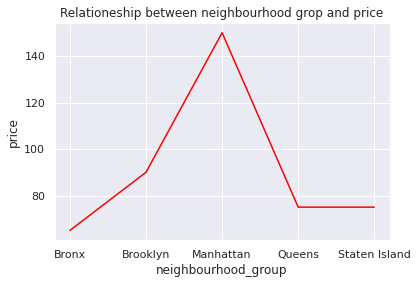

In [ ]:
neigh_grp = airbnb.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index()
print(neigh_grp)
# neigh_grp.plot(x ='neighbourhood_group', y='price', kind = 'line')
plt.plot(neigh_grp['neighbourhood_group'], neigh_grp['price'], color='red') 
plt.xlabel('neighbourhood_group') 
plt.ylabel('price') 
  
# displaying the title
plt.title("Relationeship between neighbourhood grop and price")
plt.show() 

**The above graph shows the variation of median price along with the neighbourhood group in the given dataset. The median price is highest in Manhattan as compared to other neighbourhood groups.**

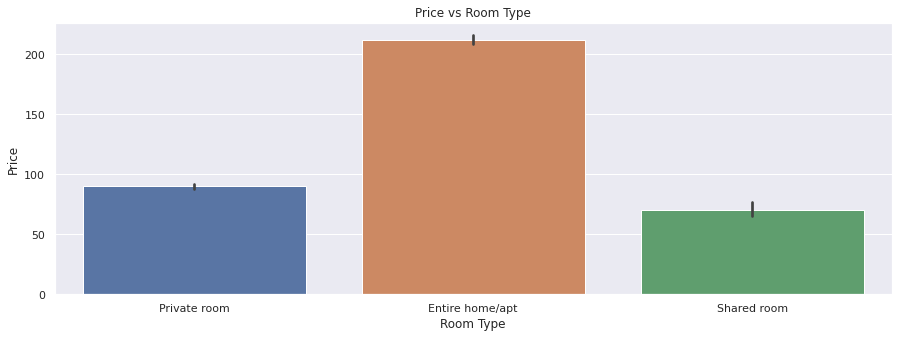

In [ ]:
plt.figure(figsize = (15,5))
z = sns.barplot(y= 'price', x= 'room_type',data=airbnb)
z.set_title('Price vs Room Type')
z.set_xlabel('Room Type')
z.set_ylabel("Price")
plt.show()

**The above bar graph shows the relationship between price and room type. The price of entire home/apt is comparitively higher than private room and shared room. Although the pricing is almost equal for a shared room and a private room(with shared room cheaper than a private room), the following graph shows that shared rooms are least prefered by the people in all the neighbourhood groups.**

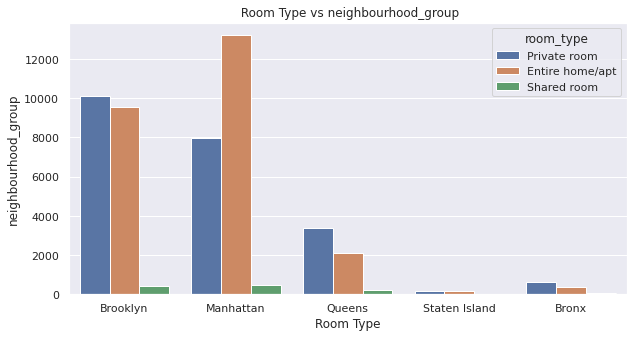

In [ ]:
plt.figure(figsize = (10,5))
b = sns.countplot(x='neighbourhood_group',hue='room_type',data=airbnb)
b.set_title(' Room Type vs neighbourhood_group')
b.set_xlabel('Room Type')
b.set_ylabel("neighbourhood_group")
plt.show()

**Above bar graph shows the variation of room types in accordance with the neighbourhood groups as per which, people in Manhattan are more comfortable to stay in Entire home/apt instead of private room or shared room whereas the relationship is reverse in case of all the othe neighbourhood groups. Moreover shared rooms are least preferred in all the neighbourhood groups.**

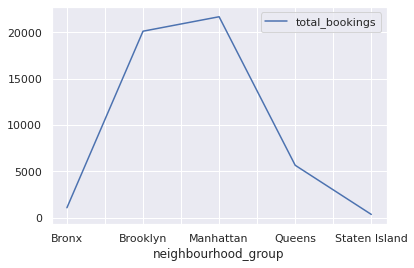

In [ ]:
l=airbnb.groupby('neighbourhood_group')['id'].count().reset_index(name='total_bookings')
l.plot(x ='neighbourhood_group', y='total_bookings', kind = 'line')

**Above line graph shows the variation of total bookings along the neighbourhood groups which indicates that the bookings are maximum in Manhattan and Brooklyn as compared to other places**